In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)


def aggregate_score(dataframe, func, name_column='Name'):
    return dataframe.groupby(name_column).agg(func).reset_index()


In [3]:
output_dir = 'results2019-10-21T22:33:54.726994'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df_mean = aggregate_score(df, np.mean)
df_std = aggregate_score(df, np.std)

In [4]:
df.head()

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
0,0.999245,7132.26,0.758389,CI-LogisticRegression,0.849624,0.684848,0.626011
1,0.999172,7846.40,0.753894,CI-DecisionTree,0.775641,0.733333,0.588564
2,0.999476,7107.85,0.829932,CI-RandomForest,0.945736,0.739394,0.627291
3,0.999570,4553.58,0.869010,CI-XGBoost,0.918919,0.824242,0.761227
4,0.614678,104857.82,0.000761,CST-CostSensitiveLogisticRegression,0.000382,0.084848,-4.498353


In [5]:
df_mean.head()

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915
1,CI-DecisionTree-BMR,0.998516,8187.6730,0.488605,0.606570,0.409455,0.613642
2,CI-DecisionTree-TO,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915
3,CI-LogisticRegression,0.999171,11254.0368,0.717198,0.870601,0.612606,0.471215
4,CI-LogisticRegression-BMR,0.997358,5051.8114,0.385305,0.325677,0.474909,0.761880


In [6]:
results = pd.DataFrame(df_mean.Name.str.split('-').values.tolist(), columns=['Model class', 'Model', 'Extra model'])
results = pd.concat([df_mean, results], axis = 1)
results = results.drop(['Name'], axis = 1)

In [7]:
results.sort_values('Savings')

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
13,0.654796,93104.8766,0.005295,0.002676,0.436121,-3.507926,CST,CostSensitiveLogisticRegression,None
3,0.999171,11254.0368,0.717198,0.870601,0.612606,0.471215,CI,LogisticRegression,None
0,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915,CI,DecisionTree,None
2,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915,CI,DecisionTree,TO
1,0.998516,8187.6730,0.488605,0.606570,0.409455,0.613642,CI,DecisionTree,BMR
6,0.999471,7477.2618,0.830163,0.931345,0.749333,0.645768,CI,RandomForest,None
5,0.998151,7185.4068,0.702828,0.675232,0.793455,0.663959,CI,LogisticRegression,TO
9,0.999485,6922.5042,0.839439,0.908712,0.780485,0.673235,CI,XGBoost,None
12,0.999023,6832.3088,0.681032,0.790681,0.600848,0.679987,CST,CostSensitiveDecisionTreeClassifier,None
11,0.997853,5743.0076,0.616692,0.538929,0.836242,0.729510,CI,XGBoost,TO


In [8]:
results.sort_values(['Model', 'Savings'])

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
12,0.999023,6832.3088,0.681032,0.790681,0.600848,0.679987,CST,CostSensitiveDecisionTreeClassifier,None
13,0.654796,93104.8766,0.005295,0.002676,0.436121,-3.507926,CST,CostSensitiveLogisticRegression,None
0,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915,CI,DecisionTree,None
2,0.999130,8264.8118,0.745340,0.755308,0.737333,0.609915,CI,DecisionTree,TO
1,0.998516,8187.6730,0.488605,0.606570,0.409455,0.613642,CI,DecisionTree,BMR
3,0.999171,11254.0368,0.717198,0.870601,0.612606,0.471215,CI,LogisticRegression,None
5,0.998151,7185.4068,0.702828,0.675232,0.793455,0.663959,CI,LogisticRegression,TO
4,0.997358,5051.8114,0.385305,0.325677,0.474909,0.761880,CI,LogisticRegression,BMR
6,0.999471,7477.2618,0.830163,0.931345,0.749333,0.645768,CI,RandomForest,None
8,0.997246,5719.5490,0.569351,0.475571,0.845212,0.732591,CI,RandomForest,TO


In [9]:
df_std

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.000068,2725.026167,0.021911,0.026250,0.038982,0.110952
1,CI-DecisionTree-BMR,0.000114,2731.737760,0.033349,0.054607,0.024340,0.111342
2,CI-DecisionTree-TO,0.000068,2725.026167,0.021911,0.026250,0.038982,0.110952
3,CI-LogisticRegression,0.000080,2713.695492,0.038698,0.020120,0.059088,0.081103
4,CI-LogisticRegression-BMR,0.000315,1743.209969,0.036514,0.043564,0.025880,0.075740
5,CI-LogisticRegression-TO,0.003152,2856.441005,0.153568,0.186312,0.068654,0.118373
6,CI-RandomForest,0.000054,1832.627634,0.019065,0.019156,0.027345,0.072831
7,CI-RandomForest-BMR,0.000504,2033.908977,0.079459,0.174900,0.023426,0.082978
8,CI-RandomForest-TO,0.001627,2185.033237,0.192593,0.260166,0.030665,0.089708
9,CI-XGBoost,0.000073,2181.963299,0.024345,0.022447,0.032076,0.093214


In [10]:
df.sort_values(['Name', 'Savings'])

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999046,14186.56,0.718266,CI-DecisionTree,0.734177,0.703030,0.373042
1,0.999099,9097.50,0.744048,CI-DecisionTree,0.730994,0.757576,0.552481
1,0.999099,9097.50,0.744048,CI-DecisionTree,0.730994,0.757576,0.552481
1,0.999099,9097.50,0.744048,CI-DecisionTree,0.730994,0.757576,0.552481


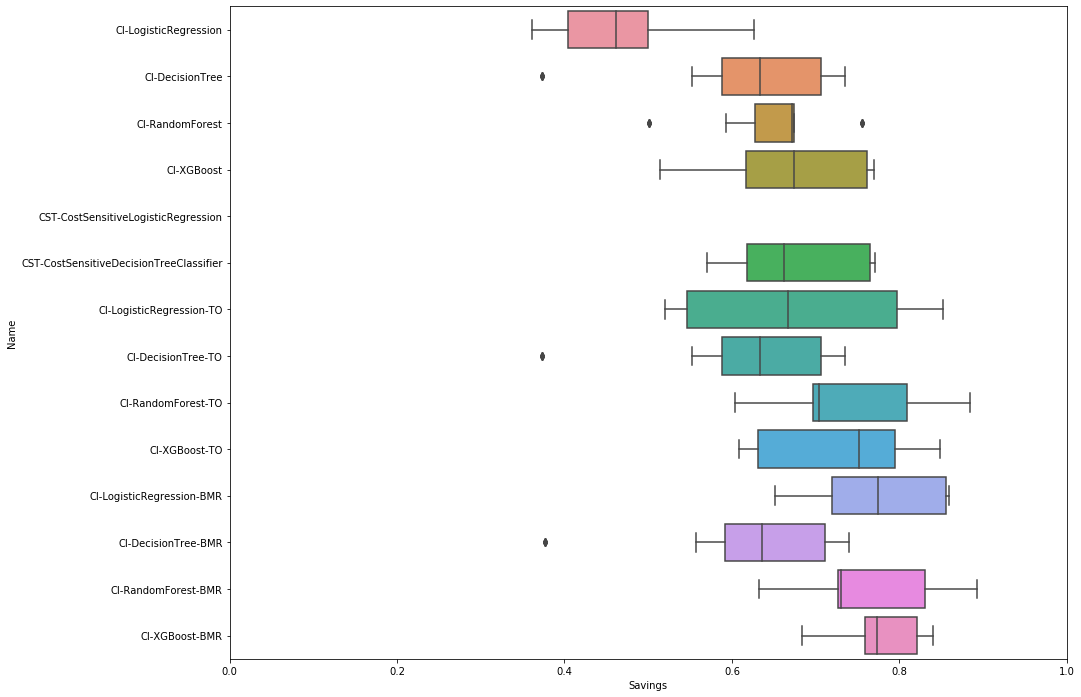

In [11]:
data = df #[df['Savings'] > 0]

fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(x = 'Savings', y = 'Name', data = data, ax = ax)
ax.set_xlim([0, 1])
plt.show()